# 💳 Credit Default Prediction

## 🎯 Business & Project Objectives

This project aims to predict whether a customer is likely to **default on their credit card payment** in the upcoming month.

From a business perspective, this kind of model allows financial institutions to:
- Detect **high-risk customers** before issuing or extending credit
- Reduce **loan default losses**
- Adjust **credit limits** and **interest rates** more precisely
- Improve **collection strategies** and **customer segmentation**

Credit scoring is a core task in retail banking. A well-performing model helps balance profitability and risk while ensuring regulatory compliance.

This project is part of my data science portfolio and showcases both **machine learning skills** and the ability to apply them to **real-world financial problems**.

---

## 📦 Dataset

- **Name:** Default of Credit Card Clients Dataset  
- **Source:** [UCI Machine Learning Repository](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)  
- **Size:** 30,000 records, 25 features  
- **Target:** `default.payment.next.month` (1 = default, 0 = no default)

The dataset includes client demographic data (age, sex, education), past payment behavior, and bill/payment amounts for the past 6 months.

---

## 🧰 Tools & Technologies

- **Python** (pandas, scikit-learn, XGBoost, imbalanced-learn)
- **Exploration & Visualization**: seaborn, matplotlib
- **Modeling & Evaluation**: Logistic Regression, XGBoost, SMOTE, ROC AUC
- **Environment**: Jupyter Notebook

---


In [3]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("UCI_Credit_Card.csv")

# Display of the first 5 lines
print(df.head())


   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [5]:
# Check dataset structure: number of entries, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [7]:
# Get summary statistics for numerical columns
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


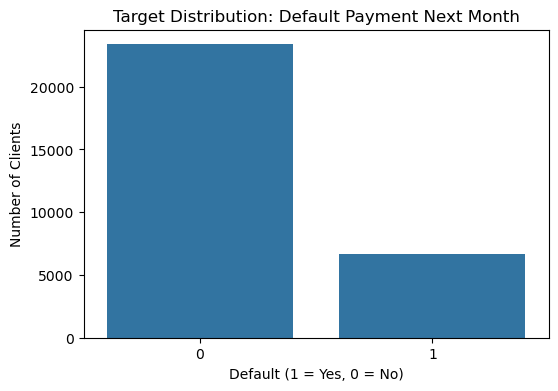

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot of the target variable (default payment next month)
plt.figure(figsize=(6,4))
sns.countplot(x='default.payment.next.month', data=df)
plt.title('Target Distribution: Default Payment Next Month')
plt.xlabel('Default (1 = Yes, 0 = No)')
plt.ylabel('Number of Clients')
plt.show()


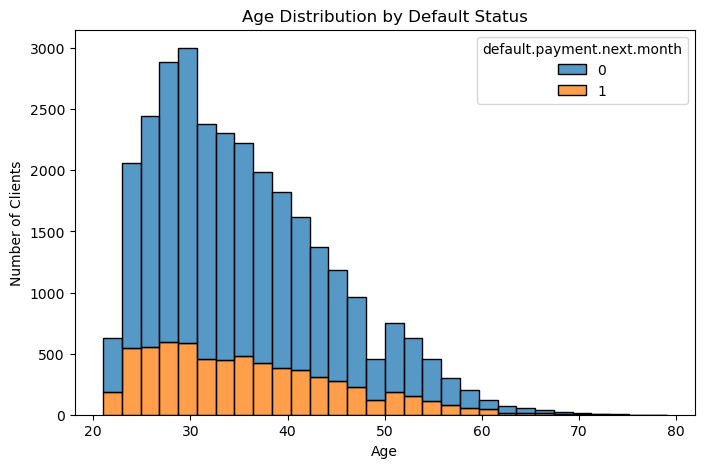

In [11]:
# Visualize age distribution grouped by default status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='AGE', hue='default.payment.next.month', multiple='stack', bins=30)
plt.title('Age Distribution by Default Status')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

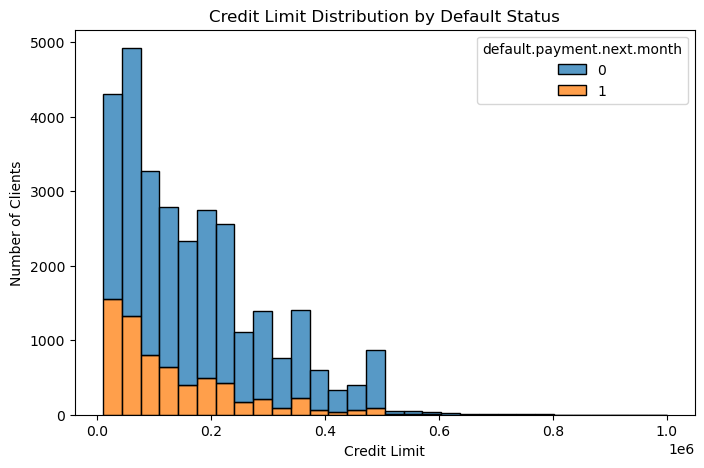

In [13]:
# Visualize credit limit distribution grouped by default status
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='LIMIT_BAL', hue='default.payment.next.month', multiple='stack', bins=30)
plt.title('Credit Limit Distribution by Default Status')
plt.xlabel('Credit Limit')
plt.ylabel('Number of Clients')
plt.show()

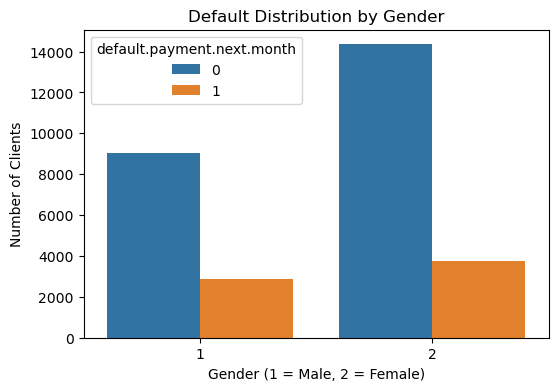

In [15]:
# Bar plot of default rate by gender
plt.figure(figsize=(6,4))
sns.countplot(x='SEX', hue='default.payment.next.month', data=df)
plt.title('Default Distribution by Gender')
plt.xlabel('Gender (1 = Male, 2 = Female)')
plt.ylabel('Number of Clients')
plt.show()

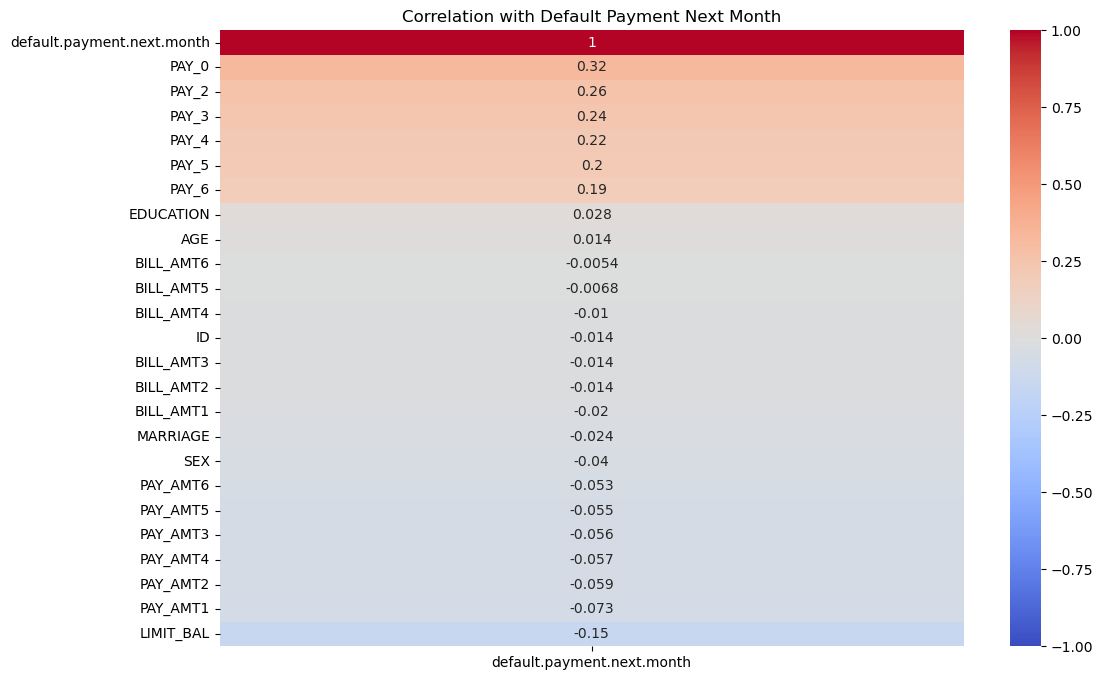

In [17]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plot heatmap focused on correlation with the target variable
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix[['default.payment.next.month']].sort_values(by='default.payment.next.month', ascending=False), 
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation with Default Payment Next Month')
plt.show()

In [19]:
# Drop the 'ID' column as it does not contribute to prediction
df = df.drop(columns=['ID'])

In [21]:
# Clean EDUCATION: values 0, 4, 5, 6 are regrouped as 'others' (value 4)
df['EDUCATION'] = df['EDUCATION'].replace([0, 4, 5, 6], 4)

# Clean MARRIAGE: value 0 is regrouped as 'others' (value 3)
df['MARRIAGE'] = df['MARRIAGE'].replace(0, 3)


In [23]:
# Separate features and target variable
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train a simple logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

D:\Anaconda_\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.806

Confusion Matrix:
[[4490  183]
 [ 981  346]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      4673
           1       0.65      0.26      0.37      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.61      0.63      6000
weighted avg       0.78      0.81      0.77      6000



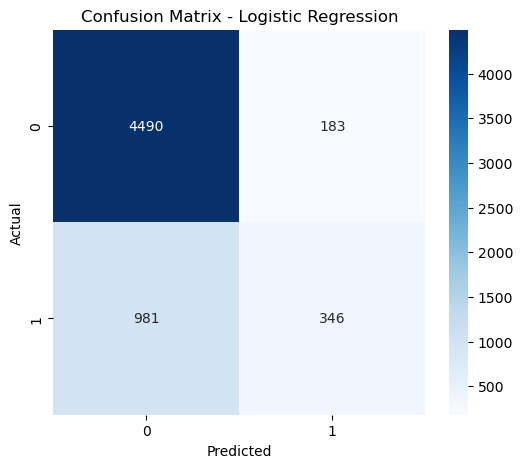

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [33]:
# Train logistic regression with balanced class weights
model_balanced = LogisticRegression(max_iter=1000, class_weight='balanced')
model_balanced.fit(X_train, y_train)

# Predict and evaluate
y_pred_balanced = model_balanced.predict(X_test)

print("Classification Report (Balanced):")
print(classification_report(y_test, y_pred_balanced))

Classification Report (Balanced):
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      4673
           1       0.37      0.61      0.46      1327

    accuracy                           0.69      6000
   macro avg       0.62      0.66      0.62      6000
weighted avg       0.76      0.69      0.71      6000



D:\Anaconda_\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

Class distribution after SMOTE:
default.payment.next.month
0    18691
1    18691
Name: count, dtype: int64


In [37]:
# Train logistic regression on balanced dataset from SMOTE
model_smote = LogisticRegression(max_iter=1000)
model_smote.fit(X_train_smote, y_train_smote)

# Predict on the original test set
y_pred_smote = model_smote.predict(X_test)

# Evaluate
print("Classification Report (SMOTE):")
print(classification_report(y_test, y_pred_smote))

Classification Report (SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.74      0.80      4673
           1       0.39      0.58      0.47      1327

    accuracy                           0.70      6000
   macro avg       0.62      0.66      0.63      6000
weighted avg       0.76      0.70      0.72      6000



D:\Anaconda_\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


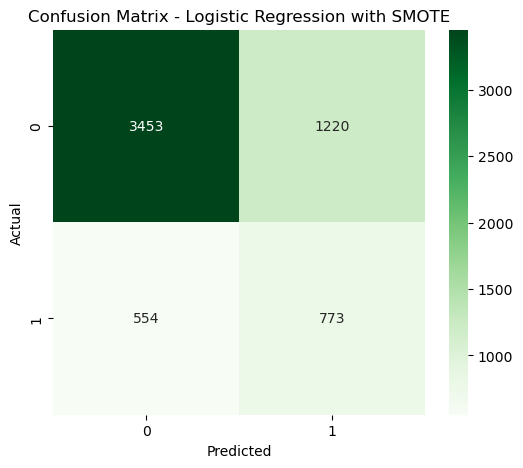

In [39]:
# Confusion matrix for SMOTE-based model
cm_smote = confusion_matrix(y_test, y_pred_smote)

plt.figure(figsize=(6,5))
sns.heatmap(cm_smote, annot=True, fmt='d', cmap='Greens', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression with SMOTE')
plt.show()

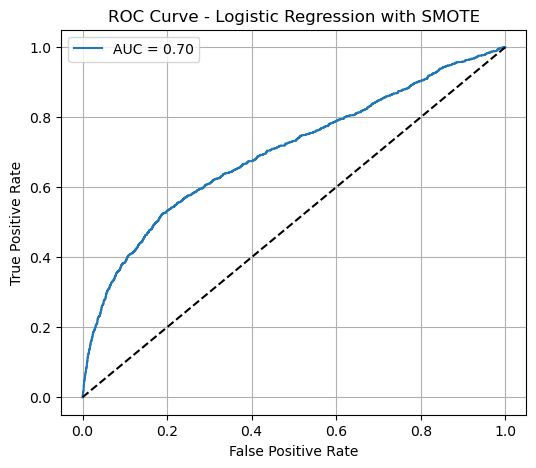

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities (needed for ROC curve)
y_proba_smote = model_smote.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_smote)
auc_score = roc_auc_score(y_test, y_proba_smote)

# Plot ROC curve
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Predict probabilities for AUC
y_proba = model.predict_proba(X_test)[:,1]
y_proba_bal = model_balanced.predict_proba(X_test)[:,1]
y_proba_smote = model_smote.predict_proba(X_test)[:,1]

# Create a comparison summary
model_names = ['Logistic', 'Logistic + Weights', 'Logistic + SMOTE']
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_balanced),
    accuracy_score(y_test, y_pred_smote)
]
f1_scores = [
    f1_score(y_test, y_pred),
    f1_score(y_test, y_pred_balanced),
    f1_score(y_test, y_pred_smote)
]
auc_scores = [
    roc_auc_score(y_test, y_proba),
    roc_auc_score(y_test, y_proba_bal),
    roc_auc_score(y_test, y_proba_smote)
]

# Display results
for name, acc, f1, auc in zip(model_names, accuracies, f1_scores, auc_scores):
    print(f"{name:<25} | Accuracy: {acc:.3f} | F1-score: {f1:.3f} | AUC: {auc:.3f}")

Logistic                  | Accuracy: 0.806 | F1-score: 0.373 | AUC: 0.712
Logistic + Weights        | Accuracy: 0.688 | F1-score: 0.461 | AUC: 0.707
Logistic + SMOTE          | Accuracy: 0.704 | F1-score: 0.466 | AUC: 0.700


In [45]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
import xgboost as xgb
from xgboost import XGBClassifier

# Compute class weight manually
weight_ratio = y_train.value_counts()[0] / y_train.value_counts()[1]

# Train XGBoost with class weight adjustment
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=weight_ratio, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate
print("Classification Report - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

D:\Anaconda_\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:46:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4673
           1       0.46      0.57      0.51      1327

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.67      6000
weighted avg       0.78      0.76      0.77      6000



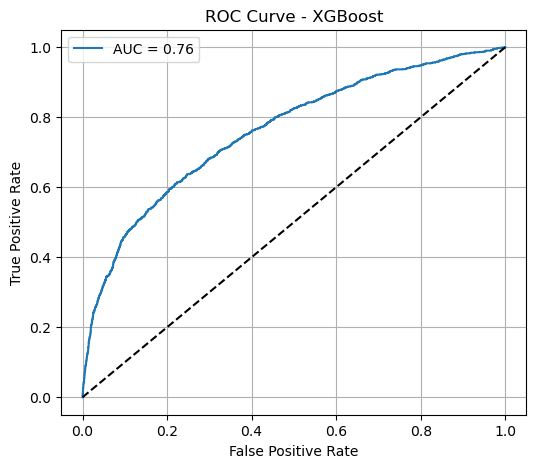

In [49]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
auc_score_xgb = roc_auc_score(y_test, y_proba_xgb)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'AUC = {auc_score_xgb:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend()
plt.grid(True)
plt.show()

## Conclusion and Learnings

In this project, we developed and compared several models to predict credit card default, a classic yet relevant problem in finance.

### ✅ Summary of steps:
- Loaded and cleaned a real-world financial dataset
- Identified and corrected anomalies in categorical variables
- Dealt with class imbalance using both class weights and SMOTE
- Trained a baseline logistic regression model
- Improved performance with SMOTE and a more advanced model (XGBoost)
- Evaluated models using appropriate metrics for imbalanced data: F1-score and ROC AUC

### 📊 Best model performance:
XGBoost with `scale_pos_weight` delivered the best balance between recall and precision, achieving a strong ROC AUC score.

### ⚠️ Limitations:
- No hyperparameter tuning was performed (default model settings used)
- External economic factors (e.g. interest rate, employment status) are not included in the dataset

### 🚀 What could be improved:
- Use GridSearchCV or Optuna for hyperparameter optimization
- Add feature importance analysis (e.g. SHAP values)
- Deploy the model via a simple dashboard (e.g. Streamlit)

---

## 💡 Final Note 

This project was designed to showcase:
- A full end-to-end machine learning pipeline
- The ability to handle imbalanced classification problems
- Clear thinking and explainable results

While the dataset is public and the problem is well-known, the code, visualizations, and decisions reflect best practices you can expect from a junior data scientist ready to work in real-world financial risk projects.
